У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_path = '../data/yulu_rental.csv'
df = pd.read_csv(data_path)
type(df)

pandas.core.frame.DataFrame

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

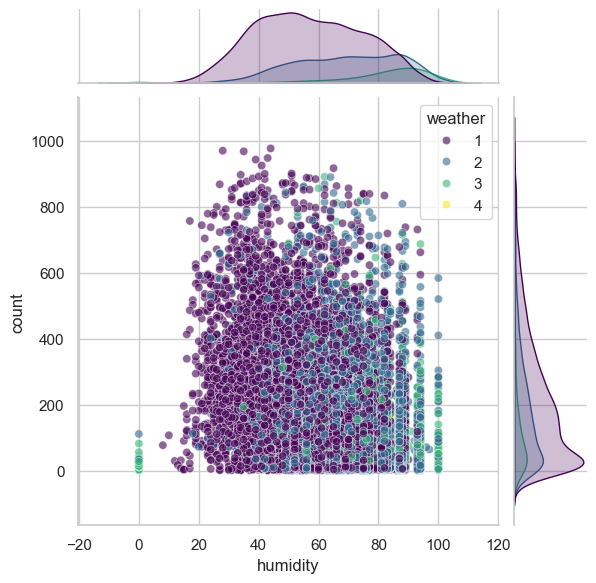

In [5]:
sns.set(style="whitegrid")
plot = sns.jointplot(
    data=df,
    x="humidity", 
    y="count", 
    hue="weather", 
    kind="scatter", 
    alpha=0.6, 
    palette="viridis"
)

Бачимо, що при відносній вологості від 0% до 20% та від 80 до 100% кількість користувачів суттєво нижча, максимально комфортна відносна вологість повітря від 20% до 80%. Аналогічна ситуація з погодою, у ясну або частково хмарну погоду (weather=1) кількість оренд значно більша ніж за туманної погоди чи легкої негоди (weather=2) і як сильний дощ чи сніг (weather=3 і weather=4), кількість оренд найнижча. На основі цих даних можна буде приймати рішення стосовно прогнозування попиту, отимізація парків велосипедів, застосування маркетинговий стратегій та ін.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

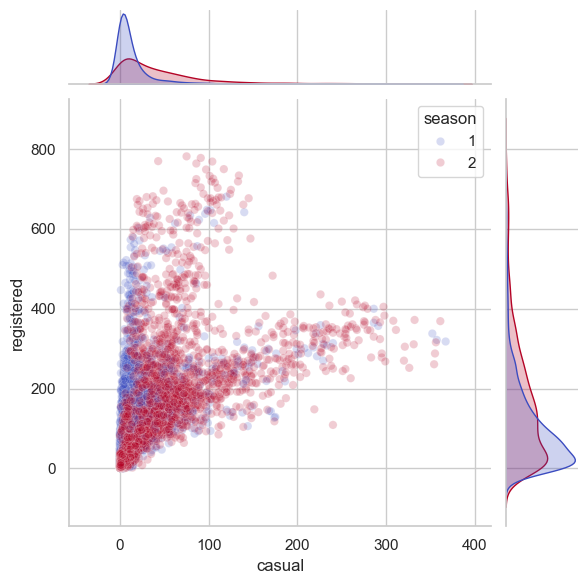

In [13]:
spring_summer_data = df[df['season'].isin([1, 2])]
sns.set(style="whitegrid")
plot = sns.jointplot(
    data=spring_summer_data,
    x="casual", 
    y="registered", 
    hue="season", 
    kind="scatter", 
    alpha=.2,
    palette="coolwarm"
)

На графіку можна спостерігати позитивне збільшення як зареєстрованих користувачів так і не зареєстрованих, відповідно чим ближче до літніх місяців тим більше користувачів. На основі цих даних можна буде приймати рішення стосовно підготовки до пікового сезону, прогнозування попиту, отимізація парків велосипедів, застосування маркетинговий стратегій та ін.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


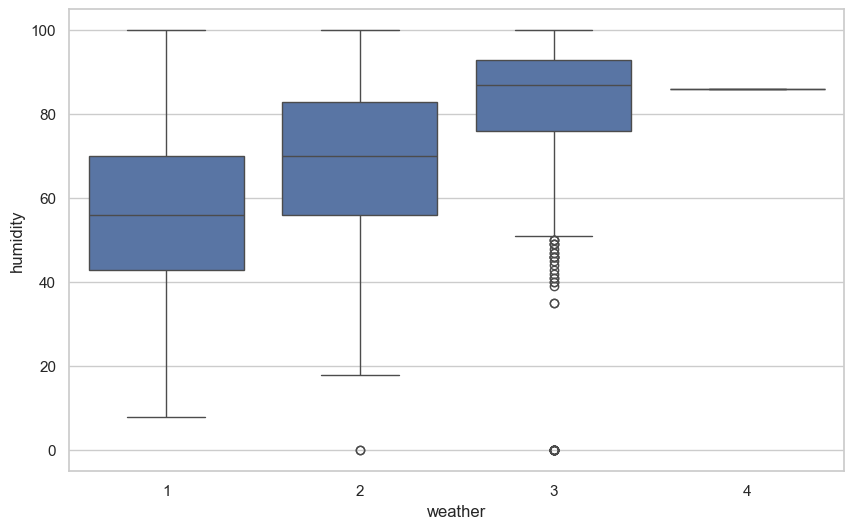

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weather', y='humidity');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

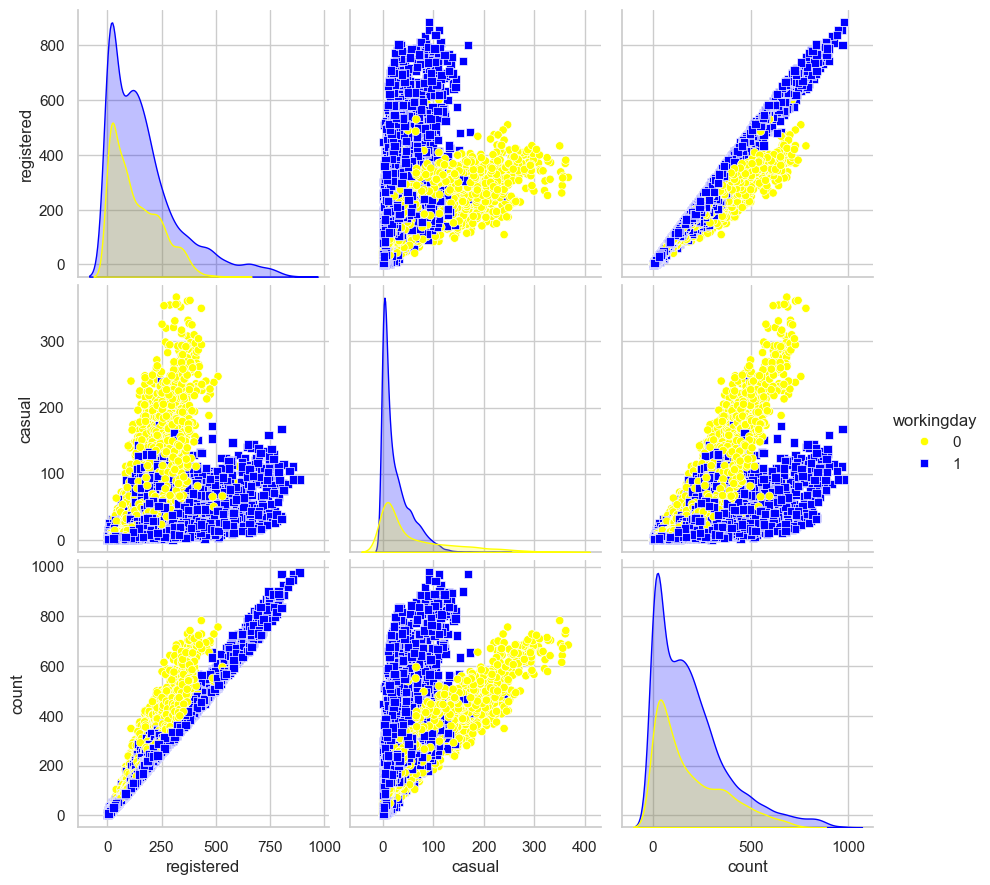

In [41]:
selected_columns = df[['registered', 'casual', 'count', 'workingday']]

pairplot = sns.pairplot(
    selected_columns, 
    hue='workingday', 
    palette={0: 'yellow', 1: 'blue'}, 
    diag_kind='kde', 
    markers=['o', 's'],
    height=3
)

На графіках можна побачити, що у святкові дні зареєстровані користувачі орендують велосипед значно рідше ніж у робочі дні. Не зареєстровані користувачі використовують велосипед значно більше у святкові дні ніж у робочі. Частка користувань у святкові дні є меншою ніж кількість користувань в робоічі дні.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [43]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [45]:
df['date'] = df.datetime.dt.date

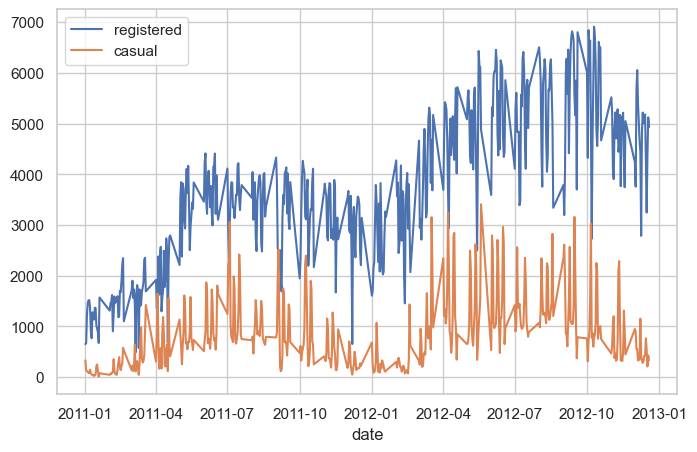

In [105]:
df_viz = df[['date', 'registered', 'casual']]
df_viz_grouped = df_viz.groupby('date').sum()

fig, ax = plt.subplots(figsize=(8, 5))
df_viz_grouped.plot(ax=ax);

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
